In [1]:
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import openpyxl
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_excel("D:/CODING/PYTHON/DWDM ALGO/dataset.xlsx", engine = 'openpyxl')

In [4]:
# Encode categorical features using Label Encoder 
le_dict = {}
X = df.drop("PlayTennis", axis = 1) 
Y = df["PlayTennis"]

for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    le_dict[column] = le
y_le = LabelEncoder()
y = y_le.fit_transform(Y)

In [5]:
 #Train Decision Tree Classifier (Entropy Version)
clf = DecisionTreeClassifier (criterion="entropy", random_state=0) 
#Train Decision Tree Classifier (Entropy Version)
#clf = Decision TreeClassifier (criterion="gini", random_state=0) 
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [6]:
# Print decision rules
tree_rules = export_text(clf, feature_names=list(X.columns))
print ("Decision Tree Rules")
print (tree_rules)

Decision Tree Rules
|--- Outlook  <= 1.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook  <= 0.50
|   |   |   |--- class: 1
|   |   |--- Outlook  >  0.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- class: 1
|--- Outlook  >  1.50
|   |--- Humidity <= 1.50
|   |   |--- class: 0
|   |--- Humidity >  1.50
|   |   |--- Wind  <= 0.50
|   |   |   |--- class: 0
|   |   |--- Wind  >  0.50
|   |   |   |--- class: 1



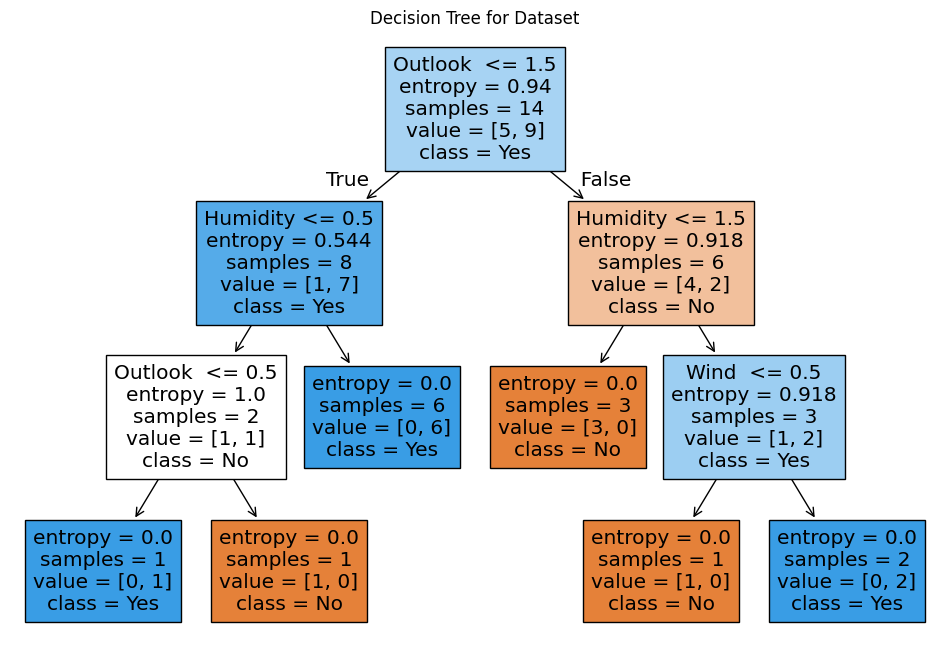

In [8]:
# plot Decision Tree
plt. figure(figsize=(12,8))
plot_tree(clf, feature_names = X.columns, class_names=y_le.classes_, filled=True)
plt.title("Decision Tree for Dataset")
plt. show()